In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path=r'C:\Users\Abd-ALrahman\Downloads\Compressed'

In [3]:
files=[file for file in os.listdir(path)]
files

['all_data.csv',
 'training_data_with_weather_info_week_1 - Copy.csv',
 'training_data_with_weather_info_week_2.csv']

In [4]:
all_data=pd.DataFrame()
for file in files[1:]:
            df_temp = pd.read_csv(path+'/'+file)
            all_data = all_data.append(df_temp, ignore_index=True)
all_data.shape

(35784, 20)

In [6]:
all_data.head(10)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1
5,6,NaN,Afghanistan,33.0,65.0,2020-01-27,0.0,0.0,27,43.0,36.5,50.7,999.9,1015.7,35.6,0.748685,0.250325,3.7,0.04,0
6,7,NaN,Afghanistan,33.0,65.0,2020-01-28,0.0,0.0,28,41.7,34.7,48.2,999.9,1016.9,34.7,0.759514,0.273882,2.4,0.00,0
7,8,NaN,Afghanistan,33.0,65.0,2020-01-29,0.0,0.0,29,15.2,13.3,16.9,774.1,1024.7,0.2,0.509437,-0.035773,2.4,0.00,0
8,9,NaN,Afghanistan,33.0,65.0,2020-01-30,0.0,0.0,30,15.2,13.3,16.9,774.1,1024.7,0.2,0.509437,-0.035773,2.4,0.00,0
9,10,NaN,Afghanistan,33.0,65.0,2020-01-31,0.0,0.0,31,5.6,4.8,7.7,774.4,1031.0,-0.6,0.751688,-0.021931,1.9,0.00,1


In [7]:
all_data.isnull().sum()

Id                        0
Province/State        19404
Country/Region            0
Lat                       0
Long                      0
Date                      0
ConfirmedCases            0
Fatalities                0
day_from_jan_first        0
temp                      0
min                     274
max                      32
stp                       0
slp                   13894
dewp                   1236
rh                     1236
ah                     1236
wdsp                      0
prcp                      0
fog                       0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')

In [10]:
imp=imp_mean.fit(all_data[['min','max','slp','rh']])

In [11]:
data=imp.transform(all_data[['min','max','slp','rh']])

In [12]:
all_data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [13]:
all_data.drop(['Date','Province/State','Country/Region'], axis=1,inplace=True)

In [14]:
X=all_data[['Lat','Id','Long']]
y=all_data[['fog']]
X.shape

(35784, 3)

In [15]:
all_data

,Id,Lat,Long,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,33.0000,65.0000,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,33.0000,65.0000,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,33.0000,65.0000,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,33.0000,65.0000,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,33.0000,65.0000,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,26378,-15.4167,28.2833,2.0,0.0,80,70.6,62.6,81.9,999.9,NaN,62.8,0.761545,0.198068,6.0,0.00,0
35780,26379,-15.4167,28.2833,2.0,0.0,81,71.3,66.2,81.5,999.9,NaN,65.3,0.812047,0.212487,7.1,99.99,1
35781,26380,-15.4167,28.2833,3.0,0.0,82,72.1,67.1,80.4,999.9,NaN,66.7,0.829815,0.218712,5.0,99.99,1
35782,26381,-15.4167,28.2833,3.0,0.0,83,71.7,66.2,80.6,999.9,NaN,62.8,0.733343,0.192580,4.2,0.00,0


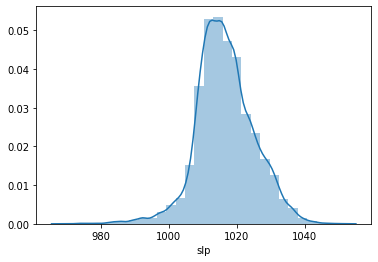

In [27]:
sns.distplot(all_data['slp'],bins=30,kde=True)